In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
n = 15
x_i = 0
x_f = 2
sigma = 0.2

x = np.linspace(x_i,x_f,n)
y_t = 3*x + 2
y_dis = sigma*np.random.randn(n)
y = y_t + y_dis
y_err = sigma + 0.01*np.random.randn(n)
np.savetxt('recta.txt',(x,y,y_err))

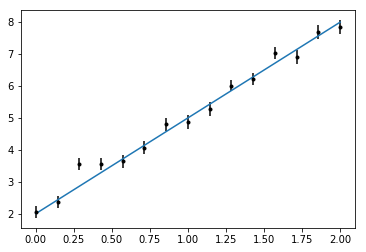

In [3]:
plt.errorbar(x,y,yerr=y_err, fmt='k.',ecolor='black')
plt.plot(x,y_t);

In [4]:
x = np.loadtxt('recta.txt')[0]
y = np.loadtxt('recta.txt')[1]
y_err = np.loadtxt('recta.txt')[2]

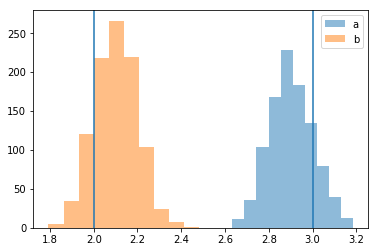

In [5]:
a0,sigma_a0= 2.9,0.1 
b0,sigma_b0 = 2.1,0.1

a_t = 3
b_t = 2

a_sample = np.random.normal(a0,sigma_a0,1000)
b_sample = np.random.normal(b0,sigma_b0,1000)

plt.hist(a_sample,alpha = 0.5, label = 'a')
plt.hist(b_sample,alpha = 0.5, label = 'b')
plt.axvline(a_t)
plt.axvline(b_t)
plt.legend()

In [6]:
def recta(x,a,b):
    return a*x + b

def chisq(theta,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x,theta[0],theta[1])
    chisq = (y-model)**2 / y_err**2
    
    return chisq.sum()

In [7]:
chisq_ = np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisq_[i] = chisq([a_sample[i],b_sample[i]],[x,y,y_err])

In [8]:
minimo = np.where(chisq_==np.min(chisq_))[0][0]

print('a minimo es:',a_sample[minimo])
print('b minimo es:',b_sample[minimo])

a minimo es: 2.888244192218808
b minimo es: 2.1861655146665995


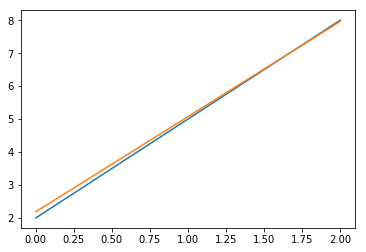

In [9]:
plt.plot(x,y_t)
plt.plot(x,a_sample[minimo]*x+b_sample[minimo]);

In [37]:
import random
random.randrange(1,100000000)/100000000

0.03739201

In [98]:
a_ini = 2.0
b_ini = 1.0
chisq([a_ini,b_ini],[x,y,y_err])

1765.597544230919

In [96]:
a_af = np.random.uniform(n_a,m_a) 
b_af = np.random.uniform(n_b,m_b) 
chisq([a_af,b_af],[x,y,y_err])

119.17009884427904

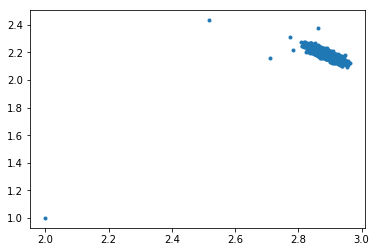

In [229]:
a_ini = 2.0
b_ini = 1.0
ch_0 = chisq([a_ini,b_ini],[x,y,y_err])

a = [a_ini]
b = [b_ini]

chisMK = []

n_a,m_a = 2.5,3.5
n_b,m_b = 1.5,2.5

for i in range(100000): 
    a_af = np.random.uniform(n_a,m_a) 
    b_af = np.random.uniform(n_b,m_b) 
    ch = chisq([a_af,b_af],[x,y,y_err])
    if ch < ch_0:
        chisMK.append(ch)
        a.append(a_af)
        b.append(b_af)
        ch_0 = ch
    else:
        r = np.random.uniform(0,1) 
        diff = ch-ch_0
        if diff<r:
            chisMK.append(ch)
            a.append(a_af)
            b.append(b_af)
            
plt.plot(a,b,'.');

<Figure size 432x288 with 0 Axes>

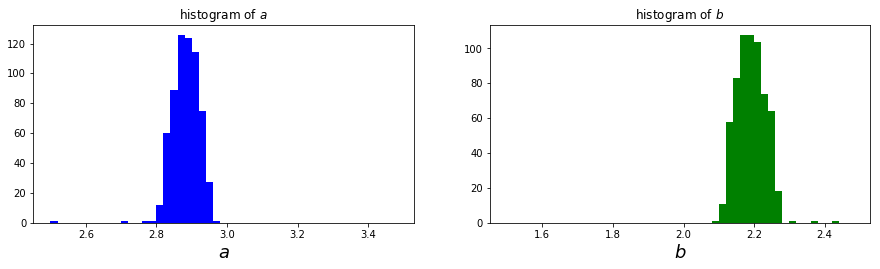

In [230]:
plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
inter = np.arange(n_a,m_a, 0.02)
plt.hist(a, bins=inter,facecolor='b')
plt.title("histogram of $a$")
plt.xlabel("$a$",fontsize=18)

plt.subplot(222)
inter = np.arange(n_b,m_b, 0.02)
plt.hist(b, bins=inter,facecolor='g')
plt.title("histogram of $b$")
plt.xlabel("$b$",fontsize=18)
plt.show()